In [1]:
#Import librairies
import numpy as np
import matplotlib.pyplot as plt

#Import the module and make it reload each time there is a change 
import importlib
import double_exo
importlib.reload(double_exo)

<module 'double_exo' from '/run/netsop/u/home-sam/home/aloyens/Internship_CACOLAC/sim_models/First_sim_CACOLAC/double_exo.py'>

#### Reminder of the general model

\begin{cases}
\dot{x} = g(x)x - f(x,y)y\\ 
\dot{y} = \gamma f(x,y) y - m(x,y)y\\
x(nT^{+}) = x(nT) - E_xh_x(x(nT))\\
y(nT^{+}) = y(nT) - E_yh_y(y(nT))\\
\end{cases} 

The aim is to compare the efficiency of two different models with exogenous mortality on pests $x$.  
There are two criteria for the comparison: the number of pests accumulated during the period (represented by the integral of $x$ at equilibrium/periodic solution); and the time for $x$ to reach an $\epsilon$ value starting from the same value.

In [2]:
#Fixed parameters
r = 0.5
K = 10 
a = 0.1
m = 0.1
gamma = 0.8

E_inf = r - 0.1 # E < r
E_sup = r + 0.1 # E > r
T = 5

t_0 = 0
t_n = 100

tt = 1 #just to not have a missing argument t when we solve models

# 1 Presence of pests $x$ only

#### Continuous model

\begin{cases}
\dot{x} = [r(1-\frac{x}{K})y- E_x]x- f(x,y) \times y\\ 
\dot{y} = \gamma f(x,y)\times y - m(x,y) \times y\\
x(nT^{+}) = x(nT) - E_x \times 0\\
y(nT^{+}) = y(nT) - E_y \times 0\\
\end{cases}  
with $y_0 = 0$

#### Impulsive model

\begin{cases}
    \dot{x} = [r(1-\frac{x}{K})y- E_x]x- f(x,y) \times y\\ 
    \dot{y} = \gamma f(x,y)\times y - m(x,y) \times y\\
    x(nT^{+}) = x(nT) - (1 - e^{-E_xT})x(nT)\\
    y(nT^{+}) = y(nT) - E_y \times 0
\end{cases}
with $y_0 = 0$

$y_0 = 0$ makes that for any functions $f$ and $m$, $y$ stays at $0$

Periodic solution and equilibrium

In [3]:
#Inital value of the periodic solution
E_tilde = 1 - np.exp(-E_inf*T)
x_p_0 = ( ( np.exp(r*T) * (1 - E_tilde) - 1 ) * K ) / ( np.exp(r*T) - 1 )

#Inital value of the equilibrium
x_star = K * (1 - E_inf/r)

## 1.1 Plot the populations and get the values of the criteria

The basic ccriteria are :  
-the integral of $x$ when the first pulse is at $t=T$ at multiple of $T$  
-the time to reach a threshold $\epsilon$ (if reached) without enhance.  
The following code compares the two models by those criteria and gives values of other useful parameters.

### 1.1.1 Periodic solution and equilibrium with first pulse at $t=T$

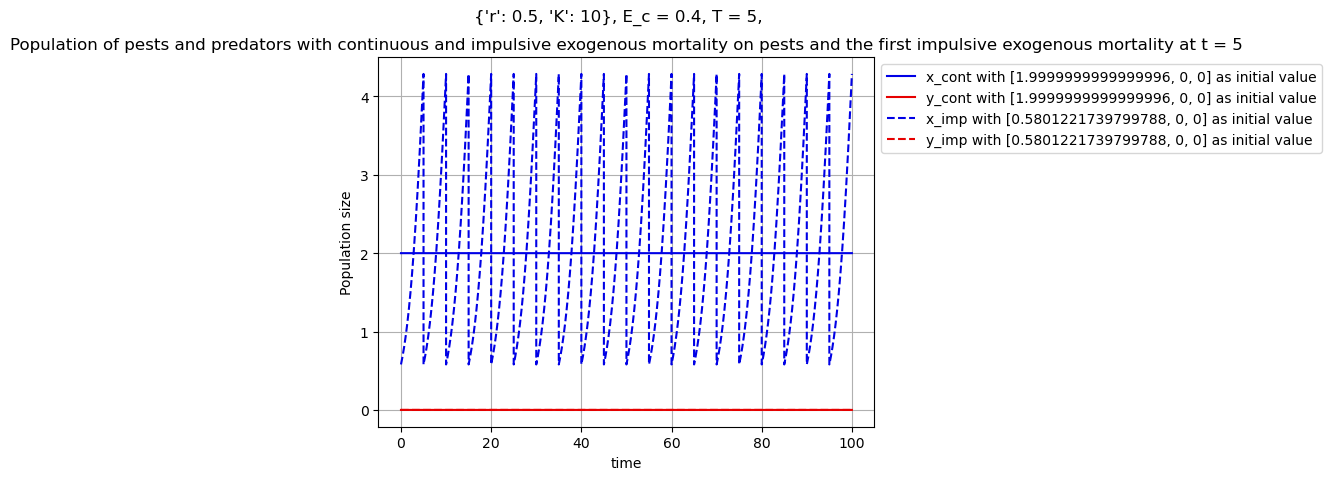

{'T': 5,
 'I_cont_final': 199.99999999999991,
 'I_imp_final': 200.00001868475857,
 'eps': 0.01,
 't_pulse': 5,
 't_eta_cont': None,
 't_eta_imp': None}

In [4]:
double_exo.compare_cont_imp_proportional_mortality_on_x(
    xyI0_imp = [x_p_0,0,0],
    xyI0_cont = [x_star,0,0],
    t=tt,
    gamma=gamma,
    E_c=E_inf,
    T=T,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n,
    t_pulse=T,
    eps=0.01,
    plot_population=True
)

### 1.1.2 Time to reach $\epsilon$ starting from the same initial value

We want to do the comparison at the "worst possible case" which is $x_0 = K$

To have eradication, we always set $E_c > r$

First exogenous mortality event at $ t=T $

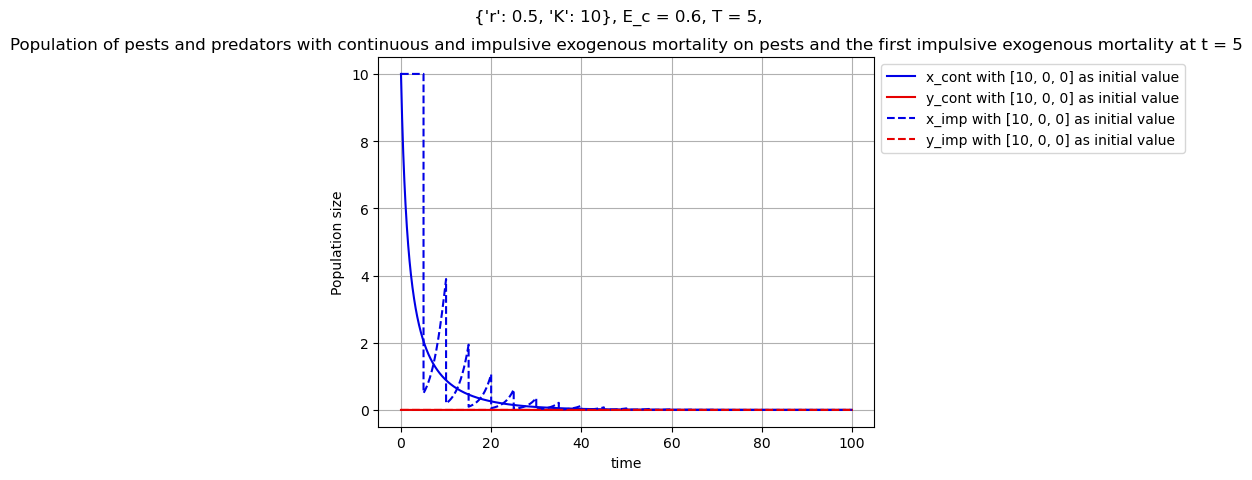

{'T': 5,
 'I_cont_final': 35.83443279398012,
 'I_imp_final': 67.63280876199002,
 'eps': 0.01,
 't_pulse': 5,
 't_eta_cont': 51.25,
 't_eta_imp': 65.0,
 't_eta_imp - t_eta_cont': 13.75}

In [5]:
double_exo.compare_cont_imp_proportional_mortality_on_x(
    xyI0_imp= [K,0,0],
    xyI0_cont= [K,0,0],
    t=tt,
    gamma=gamma,
    E_c=E_sup,
    T=T,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n,
    t_pulse=T,
    eps=0.01,
    plot_population=True
)

First exogenous mortality event at $t=0$

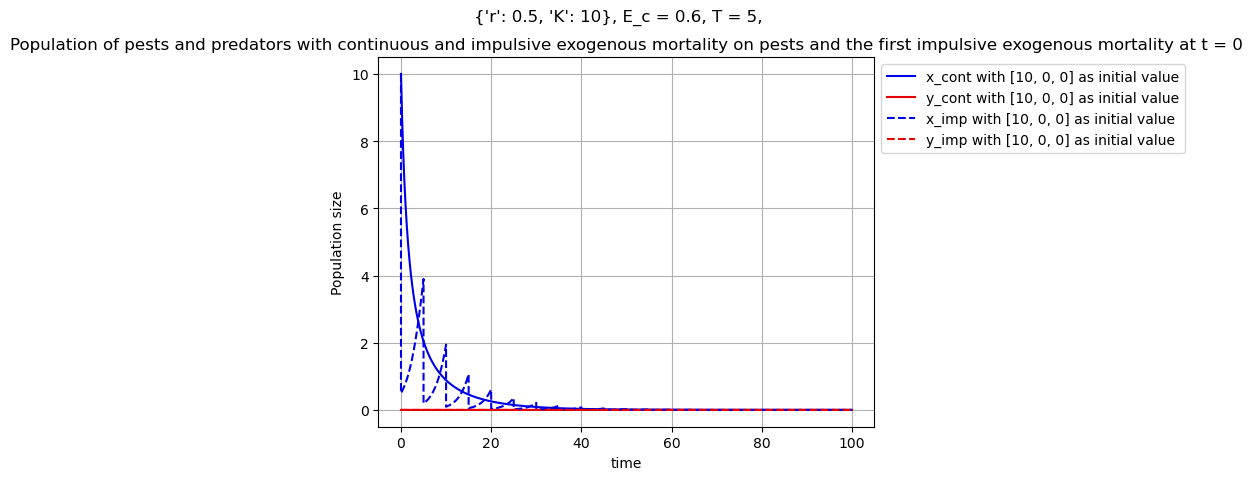

{'T': 5,
 'I_cont_final': 35.83443279398012,
 'I_imp_final': 17.633153662017758,
 'eps': 0.01,
 't_pulse': 0,
 't_eta_cont': 51.25,
 't_eta_imp': 60.0,
 't_eta_imp - t_eta_cont': 8.75}

In [6]:
double_exo.compare_cont_imp_proportional_mortality_on_x(
    xyI0_imp= [K,0,0],
    xyI0_cont= [K,0,0],
    t=tt,
    gamma=gamma,
    E_c=E_sup,
    T=T,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n,
    t_pulse=0,
    eps=0.01,
    plot_population=True
)

First exogenous mortality event at $t=2.5$ (for example)

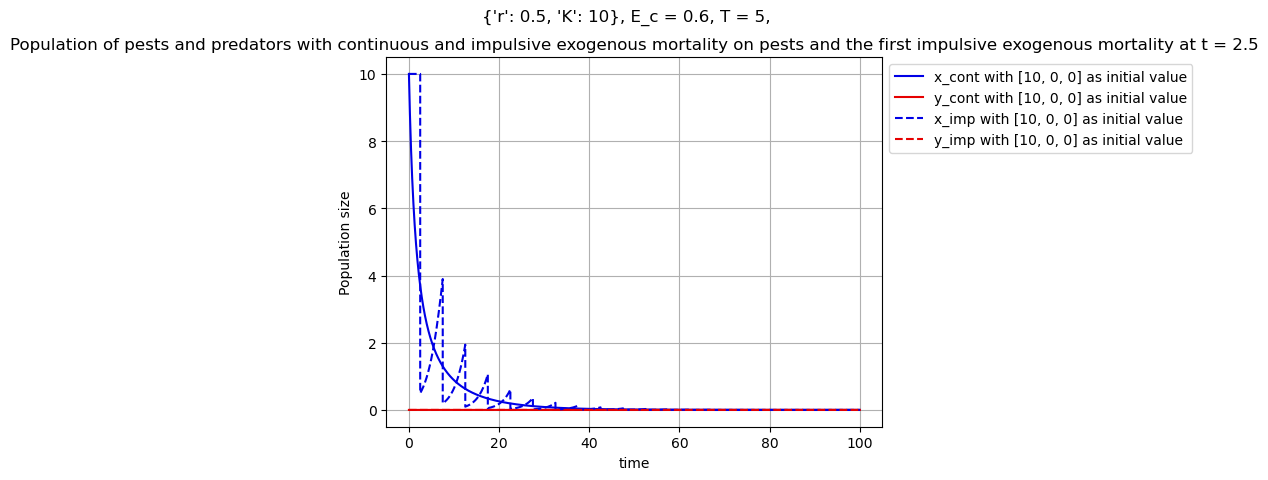

{'T': 5,
 'I_cont_final': 35.83443297660491,
 'I_imp_final': 42.63288423326491,
 'eps': 0.01,
 't_pulse': 2.5,
 't_eta_cont': 51.25,
 't_eta_imp': 62.5,
 't_eta_imp - t_eta_cont': 11.25}

In [7]:
double_exo.compare_cont_imp_proportional_mortality_on_x(
    xyI0_imp= [K,0,0],
    xyI0_cont= [K,0,0],
    t=tt,
    gamma=gamma,
    E_c=E_sup,
    T=T,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n,
    t_pulse=2.5,
    eps=0.01,
    plot_population=True
)

## 1.2 Plot graphs that compares the two models for many values of the parameters

### $t_{\eta}$ for both continuous and impulsive model with respect to $\epsilon$

In [8]:
#The different eps
eps_array = np.linspace(0.01, 5, 100)

In [9]:
t_eta_cont_array = np.zeros_like(eps_array) #array for the t_eta_cont with respect for each eps
t_eta_imp_array = np.zeros_like(eps_array) #array for the t_eta_cont with respect for each eps
for i in range(len(eps_array)):
    criteria = double_exo.compare_cont_imp_proportional_mortality_on_x( #Store the criteria dictionnary in a variable
        xyI0_imp= [K,0,0],
        xyI0_cont= [K,0,0],
        t=tt,
        gamma=gamma,
        E_c=E_sup,
        T=T,
        func_g=double_exo.logistic_model_x,
        kwargs_g={'r':r, 'K':K},
        func_f=double_exo.multiply_x,
        kwargs_f={'z': a}, 
        func_m=double_exo.identity,
        kwargs_m={'z': m},
        t_0=t_0,
        t_n=t_n,
        t_pulse=0,
        eps=eps_array[i],
        plot_population=False
        )
    if criteria['t_eta_cont'] is not None: #Verify if eps is reached 
        t_eta_cont_array[i] = criteria['t_eta_cont']
    else:
        t_eta_cont_array[i] = np.nan #If not, this value of epsilon will be ignored
    if criteria['t_eta_imp'] is not None:
        t_eta_imp_array[i] = criteria['t_eta_imp'] #Verify if eps is reached 
    else:
        t_eta_imp_array[i] = np.nan #If not, this value of epsilon will be ignored

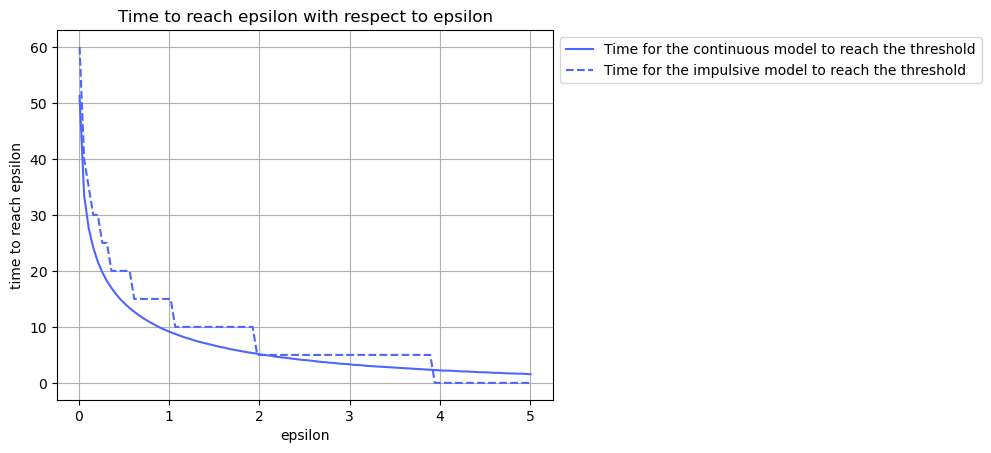

In [10]:
plt.figure()
plt.plot(eps_array, t_eta_cont_array, color = (0.3,0.4,1), linestyle = '-', label= 'Time for the continuous model to reach the threshold')
plt.plot(eps_array, t_eta_imp_array, color = (0.3,0.4,1), linestyle = '--', label= 'Time for the impulsive model to reach the threshold')
plt.xlabel('epsilon')
plt.ylabel('time to reach epsilon')
plt.title(f'Time to reach epsilon with respect to epsilon')
plt.legend(loc= 'upper left', bbox_to_anchor=(1,1))
plt.grid()
plt.show()

# 2 Presence of both pests $x$ and predators $y$

## 2.1 Plot the populations and get the values of the criteria

Time to reach $\epsilon$ starting from the same initial value

To have eradication, we always set $E_c > r$

The "worst possible initial value" is $x_0 = K$ and $y_0$ is vey small, for example $0.1$

In [11]:
#Same initial value
xyI0 = [K, 0.1, 0]

First exogenous mortality event at $t=T$

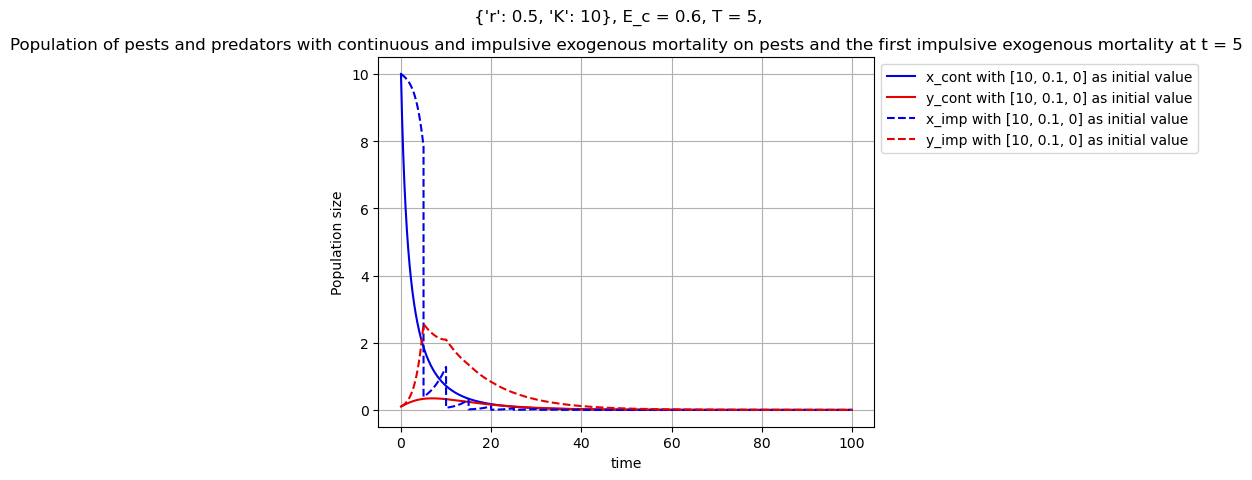

{'T': 5,
 'I_cont_final': 32.233491452521854,
 'I_imp_final': 51.74239973433285,
 'eps': 0.01,
 't_pulse': 5,
 't_eta_cont': 46.25,
 't_eta_imp': 35.0,
 't_eta_imp - t_eta_cont': -11.25}

In [12]:
double_exo.compare_cont_imp_proportional_mortality_on_x(
    xyI0_imp = xyI0,
    xyI0_cont = xyI0,
    t=tt,
    gamma=gamma,
    E_c=E_sup,
    T=T,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n,
    t_pulse=T,
    eps=0.01,
    plot_population=True
)

First exogenous mortality event at $t=0$

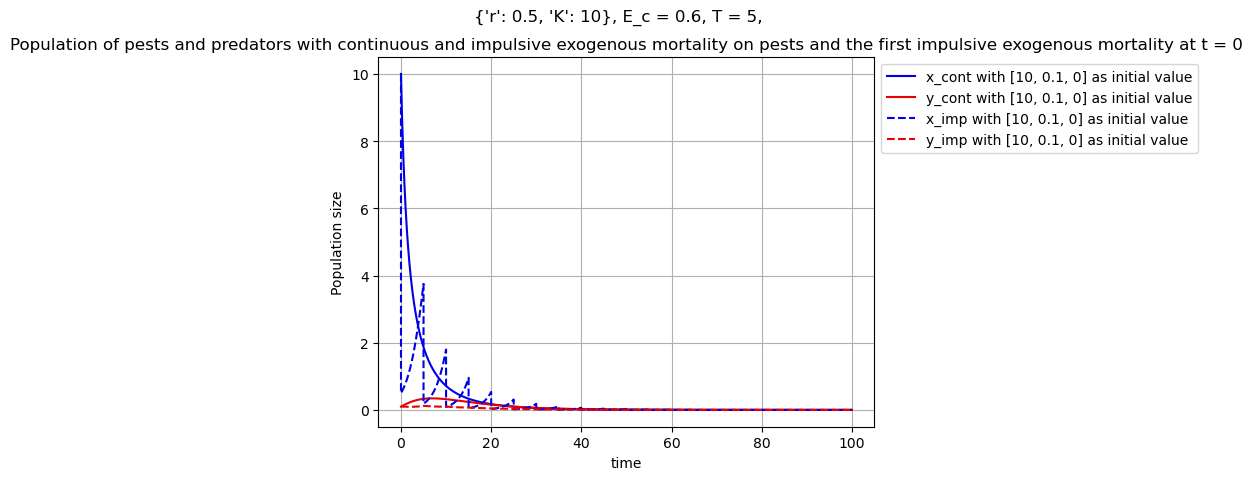

{'T': 5,
 'I_cont_final': 32.233491452521854,
 'I_imp_final': 16.582298948806628,
 'eps': 0.01,
 't_pulse': 0,
 't_eta_cont': 46.25,
 't_eta_imp': 55.0,
 't_eta_imp - t_eta_cont': 8.75}

In [13]:
double_exo.compare_cont_imp_proportional_mortality_on_x(
    xyI0_imp = xyI0,
    xyI0_cont = xyI0,
    t=tt,
    gamma=gamma,
    E_c=E_sup,
    T=T,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n,
    t_pulse=0,
    eps=0.01,
    plot_population=True
)

First exogenous mortality event at $t=2.5$ (for example)

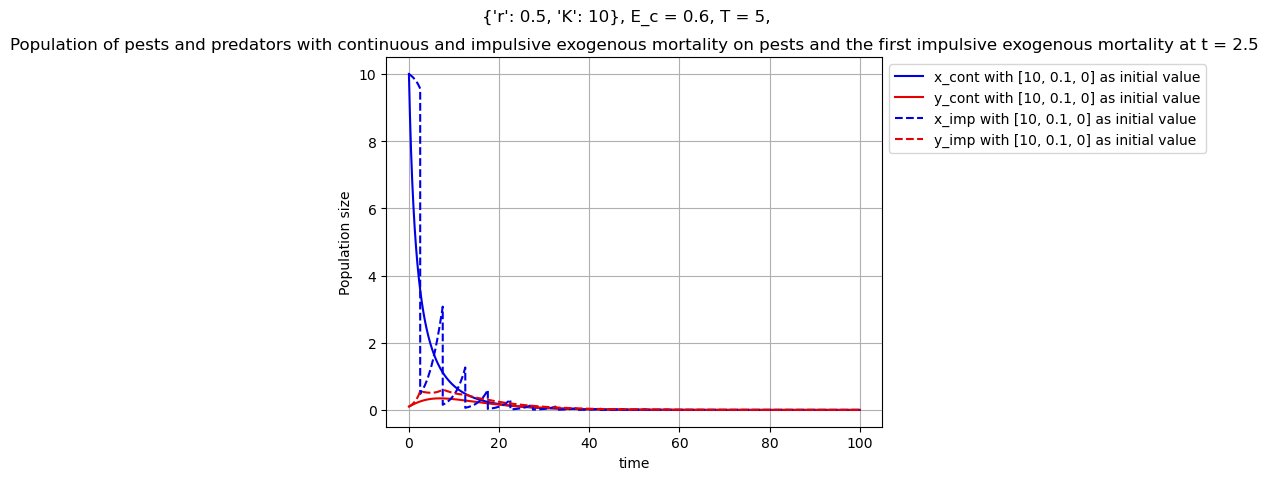

{'T': 5,
 'I_cont_final': 32.233491700673774,
 'I_imp_final': 37.17357144984434,
 'eps': 0.01,
 't_pulse': 2.5,
 't_eta_cont': 46.25,
 't_eta_imp': 52.5,
 't_eta_imp - t_eta_cont': 6.25}

In [14]:
double_exo.compare_cont_imp_proportional_mortality_on_x(
    xyI0_imp = xyI0,
    xyI0_cont = xyI0,
    t=tt,
    gamma=gamma,
    E_c=E_sup,
    T=T,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n,
    t_pulse=2.5,
    eps=0.01,
    plot_population=True
)